In [1]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
%matplotlib inline
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\var-al


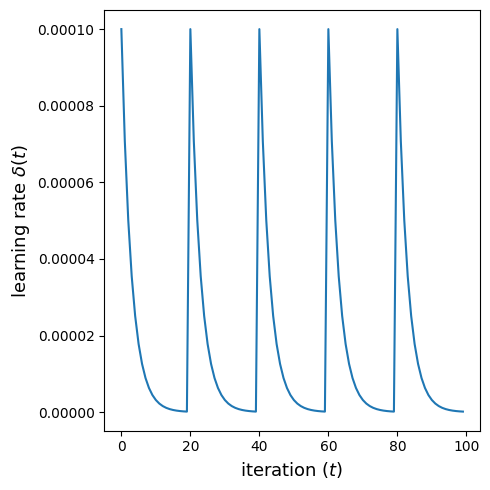

In [26]:
# set up plotting parameters
scale = 1
xlabel_size = ylabel_size = 12 + scale
tick_size = 7 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

epochs = 100
epoch, tau, b0, delb, maxb = 0, 10, 100, 1.01, 5000
initial_rate = 1e-4
decay_rate = 1e-3
decay_steps = int(2*tau)
final_learning_rate = 1e-5
final_decay_rate = 1e-2
drop = 1.0
tipping_point = int(2*tau*(maxb-b0)/delb)
final_decay_steps = epochs - tipping_point
lr_schedule = arch.CyclicLR_NP(initial_rate, decay_rate, decay_steps,final_learning_rate, final_decay_rate, final_decay_steps,\
                    drop, tipping_point)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
iters = range(0, 100, 1)
lrs = [lr_schedule(iter) for iter in iters]
ax.plot(iters, lrs)
ax.set_xlabel(r'iteration $(t)$', fontsize=xlabel_size)
ax.set_ylabel(r'learning rate $\delta(t)$', fontsize=ylabel_size)
plt.tight_layout()
plt.savefig('../plots/learning-rate.png')
plt.show()

In [3]:
lr_schedule(tf.constant(10000, dtype=tf.int32))

<tf.Tensor: shape=(), dtype=float64, numpy=0.0001>

In [4]:
step = 100
a = 1 - tf.nn.relu(tf.sign(step-lr_schedule.tipping_point))
(a*lr_schedule.initial_learning_rate*(lr_schedule.drop)**tf.math.floor(step/lr_schedule.decay_steps))# + (1-a)*lr_schedule.final_learning_rate)

TypeError: Cannot convert 0.0001 to EagerTensor of dtype int32

In [ ]:
a*(lr_schedule.drop)**tf.math.floor(step/lr_schedule.decay_steps)

In [ ]:
!pip install ipympl

In [7]:
lr_schedule.relu(1.)

1.0